In [1]:
get_ipython().magic('reset -sf')

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
from scipy.integrate import odeint, ode
from IPython import get_ipython
import sympy as sb
%matplotlib inline

FIGURES_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/figures/sleep_homeostasis_model/'
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)
    
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 5

# SLEEP HOMEOSTASIS MODEL

The proposed sleep homeostasis model based on the conceptual model from Donlea et al.[1] is given by the following system of equations:

\begin{equation}
\begin{cases}\label{eq_sleep_homeostasis_model_methods}
\tau_{R5} \dot{r_{R5}}(t) = -r_{R5}(t) + [r_H(t)]_+ \\
\tau \dot{r}_{ExR1}(t) = -r_{ExR1}(t) + [1 - r_{dFB}(t)]_+ \\
\tau \dot{r}_{dFB}(t) = -r_{dFB}(t) + [G(r_I) - d(t)]_+
\end{cases}
\end{equation}

where the switch in dFB neurons depends on previous history of R5 neurons, as:

\begin{equation}\label{eq_hysteresis}
G(r_{R5}) = \begin{cases}
1 \quad\quad  \text{if} \quad\quad r_{R5}(t) < r_{I}^{(max)} \quad \text{and} \quad \dot{r_{R5}}(t) > 0 \\
0 \quad\quad \text{if} \quad\quad r_{R5}(t) \geq r_{I}^{(max)} \quad \text{and} \quad \dot{r_{R5}}(t) > 0 \\
0 \quad\quad \text{if} \quad\quad r_{R5}(t) > r_{I}^{(min)} \quad \text{and} \quad \dot{r_{R5}}(t) < 0 \\
1 \quad\quad \text{if} \quad\quad r_{R5}(t) \leq r_I^{(min)} \quad \text{and} \quad \dot{r_{R5}}(t) < 0
\end{cases}
\end{equation}

The switch for dFB neurons with parameter values $r_{I}^{(min)} = 0.1$, $r_{I}^{(max)} = 0.6$
is shown in the following plot


---------------------------------------------------------------------

[1] Donlea, J. M., Pimentel, D., Talbot, C. B., Kempf, A., Omoto, J. J., Hartenstein, V., & Miesenböck, G. (2018). Recurrent circuitry for balancing sleep need and sleep. Neuron, 97(2), 378-389.

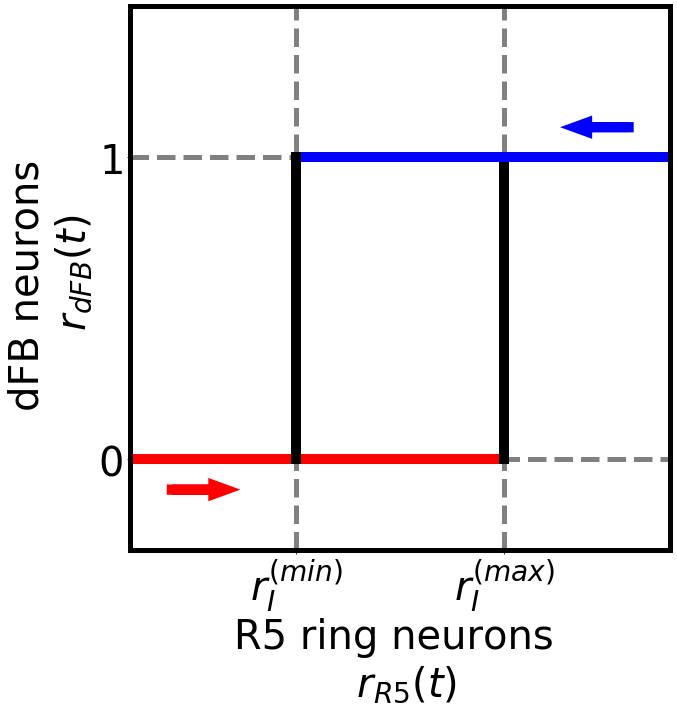

In [16]:
NumPoints = 100

r_min = 0.1
r_max = 0.6

s_min = 0
s_max = 1

r = np.linspace(r_min, r_max, NumPoints)
s = np.linspace(s_min, s_max, NumPoints)


plt.rcParams['axes.linewidth'] = 5
fig = plt.figure(figsize = (10, 10))
plt.tight_layout()
linewidth = 10
plt.gcf().subplots_adjust(left=0.15)
plt.rcParams.update({'font.size': 40})


plt.plot(np.linspace(-0.5, r_max, NumPoints) , s_min*np.ones(r.shape), color='red', linewidth = linewidth)
plt.arrow(r_min - 0.3, s_min - 0.1, 0.1, 0,linewidth = linewidth,  head_width=0.03, head_length=0.03, fc='red', ec='red')




#plt.plot(r, s_min*np.ones(r.shape), color='black', linewidth = linewidth)
plt.plot(r_max*np.ones(r.shape), s, color='black', linewidth = linewidth)

plt.plot(np.linspace(r_min, 1.5, NumPoints) , s_max*np.ones(r.shape), color='blue', linewidth = linewidth)
plt.arrow(r_max + 0.3, s_max + 0.1, -0.1, 0, linewidth = linewidth, head_width=0.03, head_length=0.03, fc='blue', ec='blue')


#plt.plot(r, s_max*np.ones(r.shape), color='black', linewidth = linewidth)
plt.plot(r_min*np.ones(r.shape), s, color='black', linewidth = linewidth)


plt.xlim([-0.3,1])
plt.xticks([ r_min, r_max], ['$r_I^{(min)}$', '$r_I^{(max)}$'])
plt.yticks([s_min, s_max],  ['$0$', '$1$'])
plt.ylim(-0.3, 1.5)
plt.grid(color='gray', linestyle='dashed', linewidth = 5)


plt.xlabel('R5 ring neurons \n $r_{R5}(t)$')
plt.ylabel('dFB neurons \n $r_{dFB}(t)$')
fig.savefig(FIGURES_DIR + 'hysteresis_dfb.svg', format='svg', dpi=1000, bbox_inches="tight")


The Dopaminergic input into dFB neurons produces sleep deprivation in the model as:

\begin{equation}
    d(t) = \begin{cases}
    1 \quad\quad \text{if sleep deprivation} \\
    0 \quad\quad \text{otherwise}
    \end{cases}
\end{equation}


The sleep time, $t_S$, and wake time, $t_W$, in the model can be computed from the dynamics of $r_{R5}(t)$ in the first equation using the different initial and final conditions, and are given by the expressions:


\begin{equation}
\begin{cases}
t_W = \tau_{R5} log\Big( \frac{r_{I}^{(min)} - 1}{r_{I}^{(max)} - 1}\Big) \\
t_S = \tau_{R5} log\Big( \frac{r_{I}^{(max)}}{r_{I}^{(min)}}\Big)
\end{cases}
\end{equation}




The values of the parameters used to generate the figures are: $\tau_{R5} = 1000 $ sec, $\tau = 0.005$ sec,  $r_{I}^{(min)} = 0.1$, $r_{I}^{(max)} = 0.6$. The following simulation is running for a maximum time of $t = 20000$ sec with time step $\Delta t = 0.001$ sec. With the previous definition of the parameters, the sleep and wake times are:

Wake  time T_W = 1098.6122886681096
Sleep time T_S = 1945.9101490553132


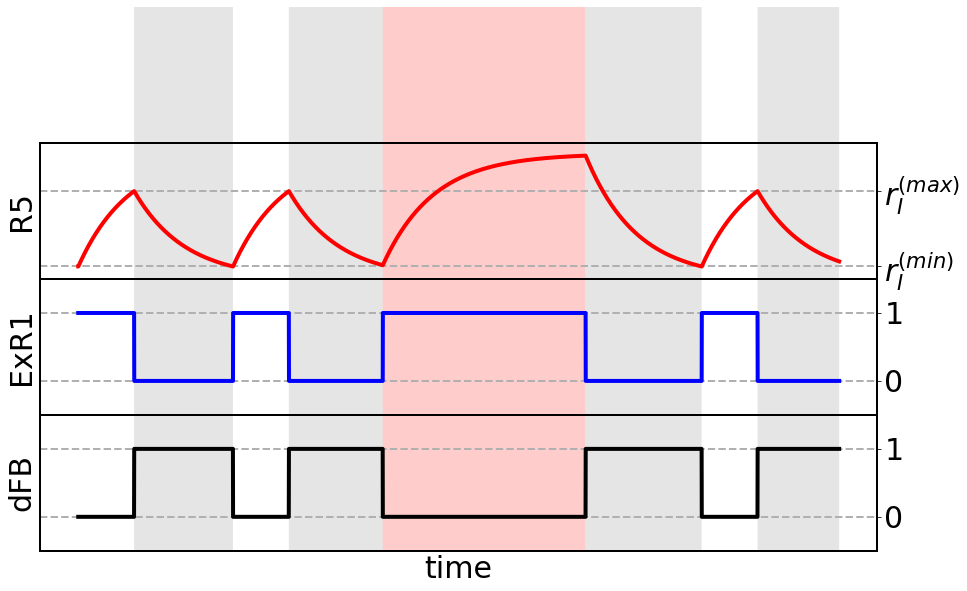

In [8]:


# Euler method parameters #########
time_step = 1# 0.001 
max_time = 15000
time = np.arange(0, max_time, time_step)

############### PARAMETERS ##############
tau_R5 = 1000    # sec
tau = 1#0.005 # sec 
tau = 1#0.005 # sec

rI_min = 0.1
rI_max = 0.7



T_W = tau_R5*np.log((rI_min-1)/(rI_max - 1))
T_S = tau_R5*np.log((rI_max)/(rI_min))

print("Wake  time T_W = " + str(T_W) )
print("Sleep time T_S = " + str(T_S) )



def hysteresis(r, drdt):
    if drdt > 0:
        if r < rI_max:
            return 0
        else:
            return 1
    elif drdt < 0:
        if r > rI_min:
            return 1
        else:
            return 0

############## VARIABLES ################

rR5 = np.zeros( len(time) )
rExR1 = np.zeros( len(time) )
rdFB = np.zeros( len(time) )
d  = np.zeros( len(time) )



drR5dt      = np.zeros( len(time) )
drExR1dt    = np.zeros( len(time) )
drdFBdt     = np.zeros( len(time) )


################# SIMULATION ###############
rR5[0] = rI_min
rExR1[0] = 1
rdFB[0] = 0


for t in range(1, len(time)):
    if time[t] > 6000 and time[t] < 10000:
        d[t] = 1
    
    rR5[t] = drR5dt[t-1] * time_step + rR5[t-1]
    rExR1[t] = drExR1dt[t-1] * time_step + rExR1[t-1]
    rdFB[t] = drdFBdt[t-1] * time_step + rdFB[t-1]
    
    
    drR5dt[t] = (1./tau_R5)* ( - rR5[t] + rExR1[t]  )
    drExR1dt[t] = (1./tau)* ( - rExR1[t] + 1 - rdFB[t]  )
    
    s_0 = hysteresis(rR5[t], drR5dt[t])
    drdFBdt[t] = (1./tau)* (-rdFB[t] + np.clip( s_0 - d[t], 0, None) )
    


    
plt.rcParams['axes.linewidth'] = 2

plt.rcParams.update({'font.size': 30})
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 10))
fig.subplots_adjust(hspace=0)

linewidth = 4
#time = np.true_divide(time, 60)

################## sleep and wake areas in the top ###############

axes[0].set_xticks([])
axes[0].set_yticks([])

axes[0].set_ylim([0,1])
axes[0].axis('off')


####################################################################

axes[1].plot(time, rR5, color='red', linewidth=linewidth)
axes[1].grid(True, linewidth = linewidth/2, linestyle='dashed')
axes[1].set_ylabel('R5')

axes[1].set_ylim([rI_min - 0.1, np.max(rR5) + 0.1])

plt.sca(axes[1])
plt.yticks([ rI_min, rI_max], ['$r_I^{(min)}$', '$r_I^{(max)}$'])

axes[2].plot(time, rExR1, label='$ExR1, r_{ExR1}(t)$', color='blue', linewidth=linewidth)
axes[2].grid(True, linewidth = linewidth/2, linestyle='dashed')
axes[2].set_ylim([-0.5,1.5])
axes[2].set_yticks([ 0, 1])
axes[2].set_ylabel('ExR1')

plt.sca(axes[2])
plt.yticks([ 0, 1])

axes[3].plot(time, rdFB, label='$dFB, r_{dFB}(t)$', color='black', linewidth=linewidth)
axes[3].grid(True, linewidth = linewidth/2, linestyle='dashed')
axes[3].set_ylim([-0.5, 1.5])
plt.sca(axes[3])
plt.yticks([ 0, 1])
axes[3].set_ylabel('dFB')

plt.sca(axes[3])
plt.xticks([])
plt.xlabel('time')

for ax in axes:
    ax.yaxis.tick_right()
    ax.fill_between(time, -10, 10,
             where=rdFB == 1 ,
             facecolor='black', alpha=0.1)

    ax.fill_between(time, -10, 10,
                 where=d == 1 ,
                 facecolor='red', alpha=0.2)
fig.savefig(FIGURES_DIR + 'sleep_homeostasis_simulation.svg', format='svg', dpi=1000)


The sleep time as a function of the wake time can be computed from the previous expression and follows,

\begin{equation}
t_S(t_W) = \tau_{R5} log \Big( \frac{1 + (r_I^{(min)} - 1)e^{-t_W/\tau_{R5}}}{r_I^{(min)}}\Big)
\end{equation}

The saturation sleep time is given therefore from the previous equation:

\begin{equation}
t_S^{sat} = \tau_{R5} log \Big( \frac{1}{r_I^{(min)}}\Big)
\end{equation}

The saturation of sleep time is $t_S^{sat} \approx 2303$ sec for the given parameters.

t_s (sat) =  2302.5850929940457


<Figure size 432x288 with 0 Axes>

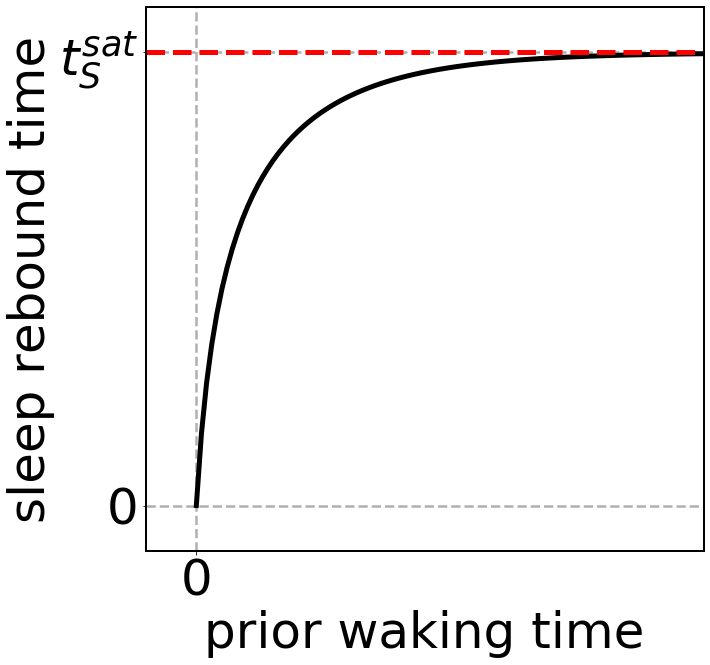

In [13]:
T_W = np.linspace(0, 5000, 100)
T_S = tau_R5*np.log(np.true_divide(  1 + (r_min - 1)*np.exp(np.true_divide(-T_W, tau_R5)), r_min  )  )

T_S_sat = tau_R5*np.log(1/r_min)
print('t_s (sat) = ', T_S_sat)

plt.gcf().subplots_adjust(left=0.5)
plt.rcParams.update({'font.size': 50})

fig = plt.figure(figsize = (10, 10))
linewidth = 5
plt.plot(T_W, T_S, linewidth=linewidth, color = 'black')
plt.plot(np.linspace(np.min(T_W) - np.max(T_W)*0.1,np.max(T_W) + np.max(T_W)*0.1, 100)
                     , T_S_sat*np.ones(T_W.shape), linestyle='--', linewidth=linewidth, color = 'red')
#plt.plot(np.linspace(np.min(T_W) - np.max(T_W)*0.1,np.max(T_W) + np.max(T_W)*0.1, 100)
#                     , 0*np.ones(T_W.shape), linestyle='--', linewidth=linewidth/2, color = 'grey')


plt.yticks([0, T_S_sat], ['0', '$t_S^{sat}$'])
plt.xticks([0])
plt.grid(True, linewidth = linewidth/2, linestyle='dashed')

plt.ylabel('sleep rebound time')
plt.xlabel('prior waking time')

plt.ylim([-T_S_sat*0.1, T_S_sat + T_S_sat*0.1])
plt.xlim([np.min(T_W) - np.max(T_W)*0.1, np.max(T_W)])

fig.savefig(FIGURES_DIR + 'homeostasis_wake_sleep_time_plot.png', format='png', dpi=500,  bbox_inches="tight")
